In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
n = 666
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
y_train[n]

7

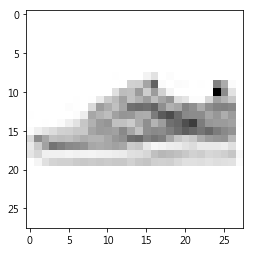

In [9]:
plt.imshow(x_train[n], cmap="Greys")

In [10]:
class_names[y_train[n]]

'Sneaker'

### 處理資料

In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

In [14]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [15]:
y_train[n]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## 打造NN

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [17]:
model = Sequential()

In [18]:
#layer1
model.add(Dense(100, input_dim = 784, activation = 'relu'))

In [19]:
#layer2
model.add(Dense(99, activation = 'relu'))

In [20]:
#layer3
model.add(Dense(98, activation = 'relu'))

In [21]:
#輸出層
model.add(Dense(10,activation='softmax'))

In [22]:
# softmax=> a+b+c=1, 維持a,b,c 大小
#處理函數-> a= exp{a}/exp{a}+exp{b}+exp{c}, b = exp{b}/ ....

###  組裝我們的神經網路

In [23]:
model.compile(loss = 'mse', optimizer= SGD(lr=0.087), metrics = ['accuracy'])

In [24]:
model.summary()
#784*100(neurons)+100(bias)= 78500

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 99)                9999      
_________________________________________________________________
dense_2 (Dense)              (None, 98)                9800      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                990       
Total params: 99,289
Trainable params: 99,289
Non-trainable params: 0
_________________________________________________________________


### 訓練

In [28]:
#train80 times
model.fit(x_train, y_train, batch_size = 50, epochs = 80)

Train on 60000 samples
Epoch 1/80
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0159 - accuracy: 0.8939
Epoch 2/80
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0159 - accuracy: 0.8940
Epoch 3/80
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0158 - accuracy: 0.8949
Epoch 4/80
60000/60000 [==============================] - 4s 58us/sample - loss: 0.0156 - accuracy: 0.8964
Epoch 5/80
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0155 - accuracy: 0.8970
Epoch 6/80
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0153 - accuracy: 0.8984
Epoch 7/80
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0152 - accuracy: 0.8982
Epoch 8/80
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0150 - accuracy: 0.9005
Epoch 9/80
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0150 - accuracy: 0.9013
Epoch 10/80
60

60000/60000 [==============================] - 3s 57us/sample - loss: 0.0102 - accuracy: 0.9368
Epoch 77/80
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0102 - accuracy: 0.9367
Epoch 78/80
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0102 - accuracy: 0.9362
Epoch 79/80
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0100 - accuracy: 0.9375
Epoch 80/80
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0100 - accuracy: 0.9374


## Result

In [29]:
result = model.predict_classes(x_test)

Prediction by NN is Dress


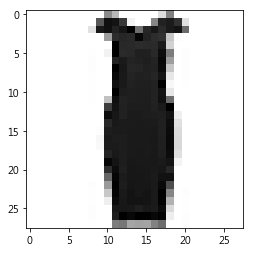

In [32]:
print('Prediction by NN is', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap = 'Greys')